# 1.数据集中predicate的统计分布

a.VRD(表格只展示前五个，统计图展示所有出现的predicate.）

| Predicate | Num | Percent|
|:------|:------|:--:|
| on  |10226|0.168|
|wear | 8692|0.143|
|above | 4834|0.08|
|next to | 4732|0.078|
|has| 4628|0.076|

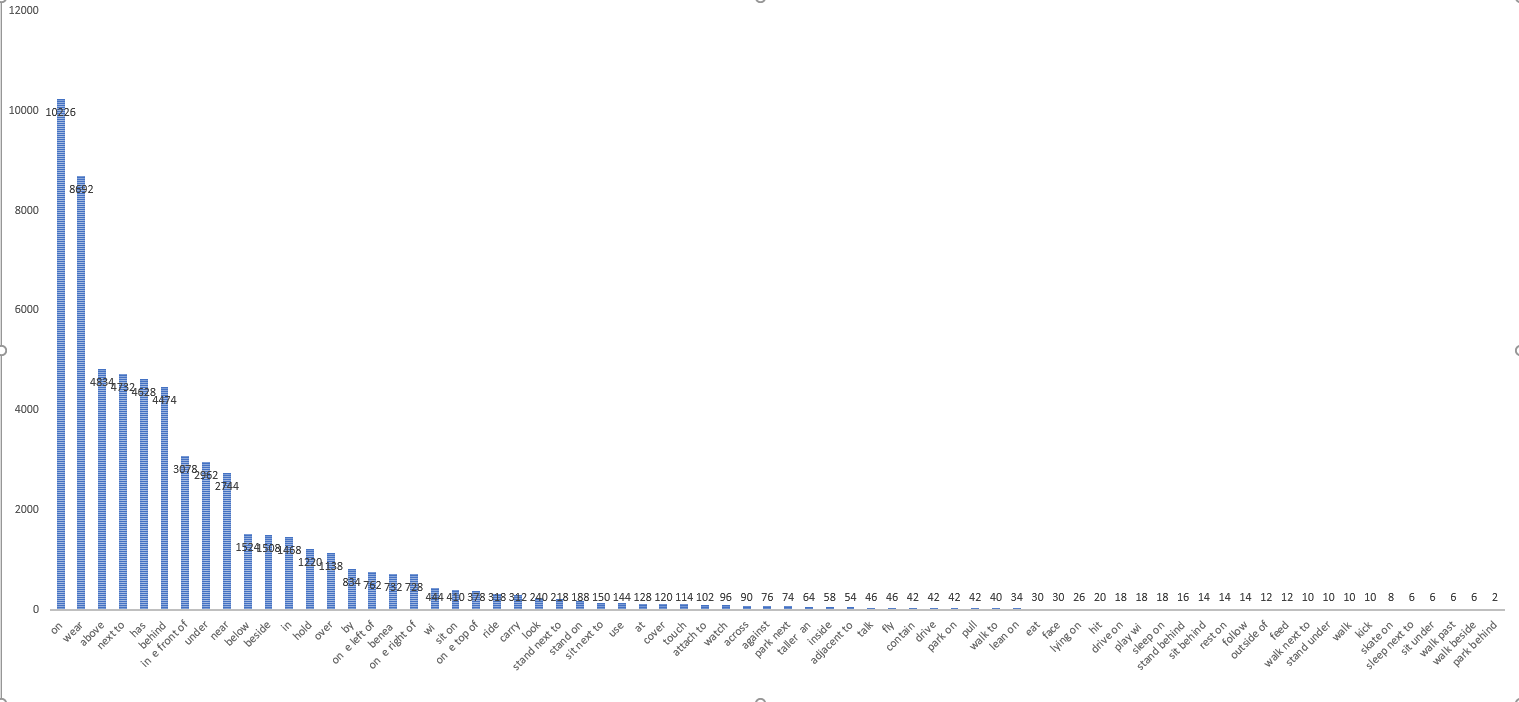

In [2]:
from IPython.display import Image
Image(filename = "vrd_sta.png")

b.  Opne Image(由于它只有10个谓语，因此我们全部列出来)

| Predicate | Num | Percent|
|:------|:------|:--:|
| is  |194142|0.518|
|hits | 100593|0.268|
|on | 31604 |0.084|
|holds | 20986 |0.056|
|at| 11493 |0.03|
| plays |8932 |0.034|
|interacts_with | 3756 |0.01|
|inside_of | 2392 |0.006|
|wears | 836 |0.002|
|under| 34 |0.0001|

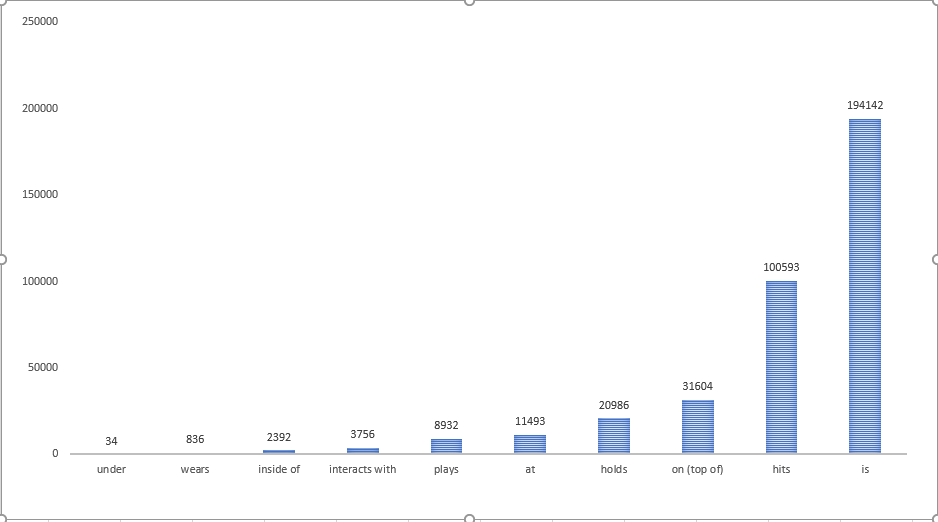

In [4]:
Image(filename = "openimage.png")

# 2.Personal Rank

a.《Modeling Relational Data with Graph Convolutional Networks》
这篇就是我们用到的R-GCN,通过增强已知的有向图中的节点特征，对未知的关系进行预测

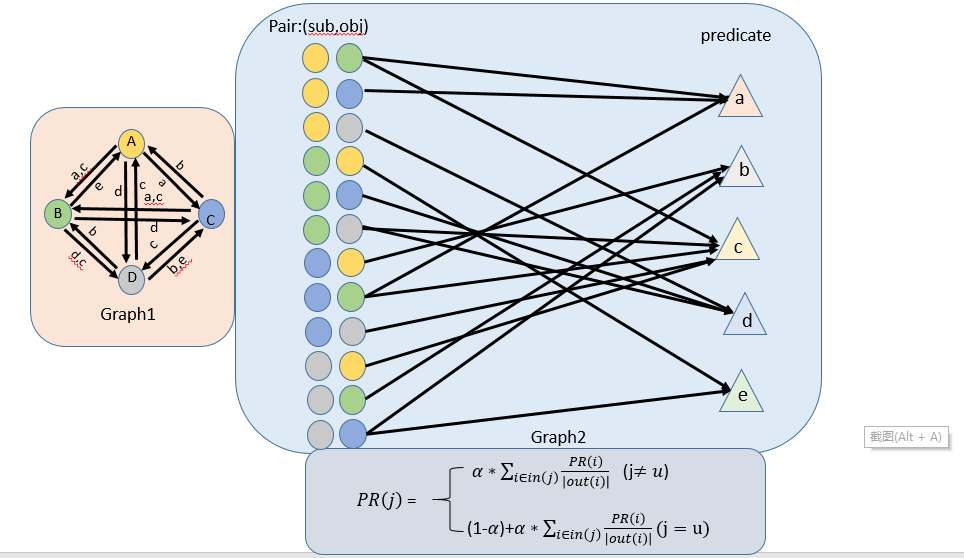

In [3]:
Image(filename = "personalrank.png")

  Graph1上出现的关系是在训练集出现过的，并赋予他们相应的统计概率。
  Graph2是针对1建模的二部图， 我们将每一对可能的pair列在左边，将所有的prediacte列在右边，根据边去连接。
  假设我们为第一对（A,B）选择最有可能的predicate。由于personal rank不区分二部图的左右点，因此实际上是计算该点对二部图所有点的兴趣程度。赋予PR(A,B) = 1， 其余点的PR值为0， PR代表该点的重要程度。开始在图上游走，每次从PR不为0的节点开始游走，继续游走的概率为𝛼，停留的概率为1-𝛼。
  第一次游走， 从（A,B）节点以0.7和0.3的概率走到了a和c，这样a和c就分得了(A,B)的部分重要度，PR(a)=αxPR(A,B)x 0.7， PR(c)=αxPR(A,B)x0.3。最后PR(A,B)变为1−α。第一次游走结束后PR不为0的节点有(A,B),a,c。
  第二次游走，分别从节点(A,B),a,c开始，往前走一步。这样节点a分得(A,B),1/2α的重要度，节点c分得(A,B),1/2α的重要度，节点(A,B)分得a 1/3∗α的重要度，节点(A,B)分得c 1/5∗α的重要度，节点(A,C)分得a 1/3∗α的重要度，节点(C,B)分得a 1/3∗α的重要度,节点(B,D)分得c 1/5∗α的重要度,节点(D,A)分得c 1/5∗α的重要度,节点(C,D)分得c 1/5∗α的重要度, 节点(C,B)分得c 1/5∗α的重要度。最后PR(A,B)要加上1−α。
  经过多次游走，各节点的重要度趋于稳定。这种方法不仅可以选择最相关的关系，而且可以选择相关的pair对作为高级语义。

# 3.RGCN

《Modeling Relational Data with Graph Convolutional Networks》通过吸收已知的文本类有向图关系，增强节点特征，从而预测未知关系。本文为检测RGCN的特性，做了link predication和entity classfication。link predication就是恢复有向图中部分缺失的关系。RGCN的公式和模型图如下。为计算第i个节点的第l+1层特征，输入第l层的与i相邻的节点特征（区分出度和入度）和它自身在第i层的特征。

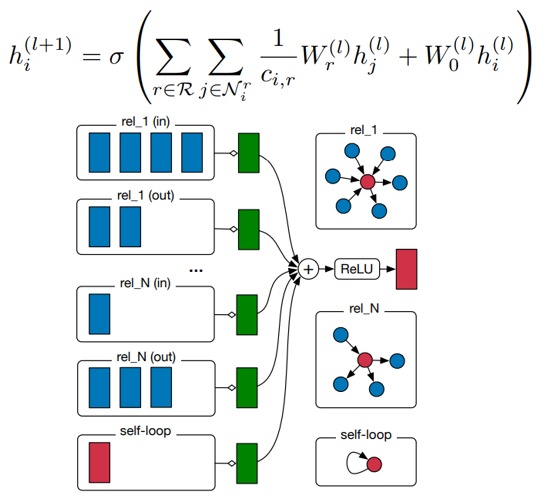

In [5]:
Image(filename = "rgcn.png")

link predication的结构图如下，encoder部分用rgcn,decoder部分用distmult。

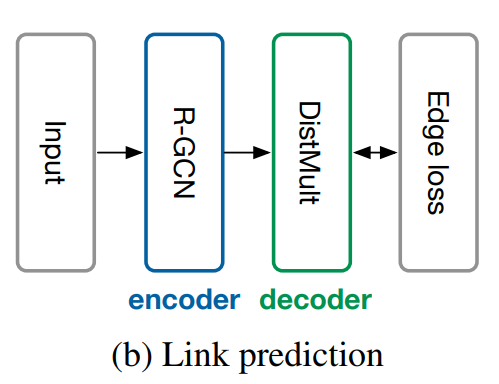

In [6]:
Image(filename = "linkpredication.png")

# 4.Scene Graph

《Neural Motifs: Scene Graph Parsing with Global Context》

《Scene Graph Generation by Iterative Message Passing》